# 1. Project introduction
This project is based on the background of personal credit in financial risk control, and requires predicting whether there is a possibility of default based on the data information of the loan applicant, so as to decide whether to approve the loan.

# 2. Dataset Description

## 2.1 Overview
The data comes from the loan records of a credit platform, with a total data volume of more than 1 million, including 47 columns of variable information, 15 of which are anonymous variables. Among them, 800,000 records are used as the training set, and 200,000 records are used as the test set A.

## 2.2 Data Dictionary
| Variable | Definition |
| :-----| :----- |
| Id | Unique id of credit identifier assigned to the loan list |
| loanAmnt | loan amount |
| term | Loan term (year) |
| interestRate | Lending rates |
| installment | Installment amount |
| grade | loan grade |
| subGrade | Subclasses of Loan Grades |
| employmentTitle | Employment title |
| employmentLength | Years of employment |
| homeOwnership|Ownership status of the home as provided by the borrower at the time of registration
| annualIncome | Annual income
verificationStatus	| verification Status
issueDate | issue Date
purpose | The loan purpose category of the borrower at the time of the loan application
postCode | The first 3 digits of the postal code provided by the borrower in the loan application
regionCode | region Code
dti | debt-to-income ratio
delinquency_2years | The number of default events overdue for more than 30 days in the borrower's credit file in the past 2 years
ficoRangeLow | The lower limit range of the borrower's fico at the time of loan disbursement
ficoRangeHigh | The upper limit range of the borrower's fico at the time of loan disbursement
openAcc | The number of outstanding credit lines in the borrower's credit file
pubRec | Number of derogatory public records
pubRecBankruptcies | Number of public records expunged
revolBal | Total credit turnover balance
revolUtil | Revolving Facility Utilization
totalAcc | The total number of credit lines currently in the borrower's credit file
initialListStatus | Initial Listing Status of the Loan
applicationType | Indicate whether the loan is an individual application or a joint application with two co-borrowers
earliesCreditLine | The month in which the borrower's earliest reported line of credit was opened
title | The name of the loan provided by the borrower
policyCode | Publicly Available Policy_Code=1 New Product Not Publicly Available Policy_Code=2
n-series anonymous features Anonymous features | n0-n14, processing for counting features for some lender behavior

# 3. Data Exploratory

## 3.1 import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./testA.csv')

## 3.2 Exploratory

### 3.2.1 Data profiling

In [3]:
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (800000, 47)
test data shape: (200000, 46)


In [4]:
print("the columns of train:", train.columns)
print("the columns of test:", test.columns)

the columns of train: Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')
the columns of test: Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHig

There is one more column called "isDefault" in training data, this would be the target need to be predected.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [6]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


### 3.2.2 Missing values

In [7]:
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

<Axes: >

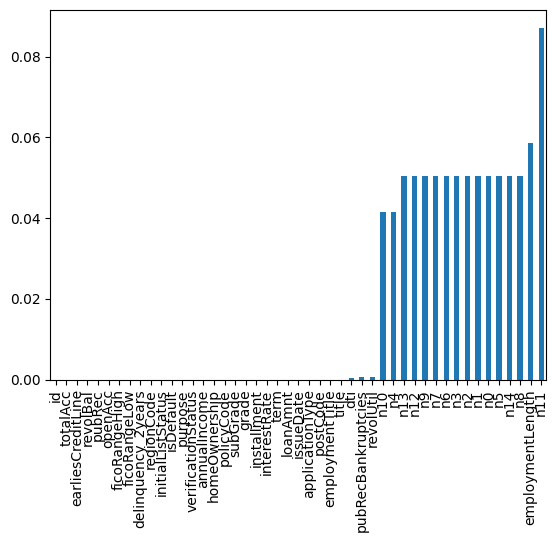

In [8]:
missing_rate = train.isnull().sum() / len(train)
missing_rate.sort_values(inplace=True)
missing_rate.plot.bar()

### 3.2.3 Feature's data type

In [9]:
# check numerical features
numerical_fea = list(train.select_dtypes(exclude=['object']).columns)
print(numerical_fea)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [10]:
# check object features
object_fea = list(train.select_dtypes(include=['object']).columns)
print(object_fea)

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


In [11]:
# distinct discrete and continuous numerical features
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_nonserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_nonserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea, numerical_nonserial_fea
numerical_serial_fea, numerical_nonserial_fea = get_numerical_serial_fea(train,numerical_fea)

In [12]:
print(numerical_serial_fea, len(numerical_serial_fea))

['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14'] 33


In [13]:
print(numerical_nonserial_fea, len(numerical_nonserial_fea))

['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12'] 9


there are 33 continuous numerical features and 9 discrete numerical features.

### 3.2.4 Discrete data analysis

In [14]:
for fea in numerical_nonserial_fea:
    a = train[fea].value_counts()
    print(fea,"value, count: \n", a)

term value, count: 
 term
3    606902
5    193098
Name: count, dtype: int64
homeOwnership value, count: 
 homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: count, dtype: int64
verificationStatus value, count: 
 verificationStatus
1    309810
2    248968
0    241222
Name: count, dtype: int64
isDefault value, count: 
 isDefault
0    640390
1    159610
Name: count, dtype: int64
initialListStatus value, count: 
 initialListStatus
0    466438
1    333562
Name: count, dtype: int64
applicationType value, count: 
 applicationType
0    784586
1     15414
Name: count, dtype: int64
policyCode value, count: 
 policyCode
1.0    800000
Name: count, dtype: int64
n11 value, count: 
 n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: count, dtype: int64
n12 value, count: 
 n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: count, dtype: int64


### 3.2.5 Continuous data analysis

In [22]:
import seaborn as sns
f = pd.melt(train, value_vars=numerical_serial_fea)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x116089c10> (for post_execute):


KeyboardInterrupt: 

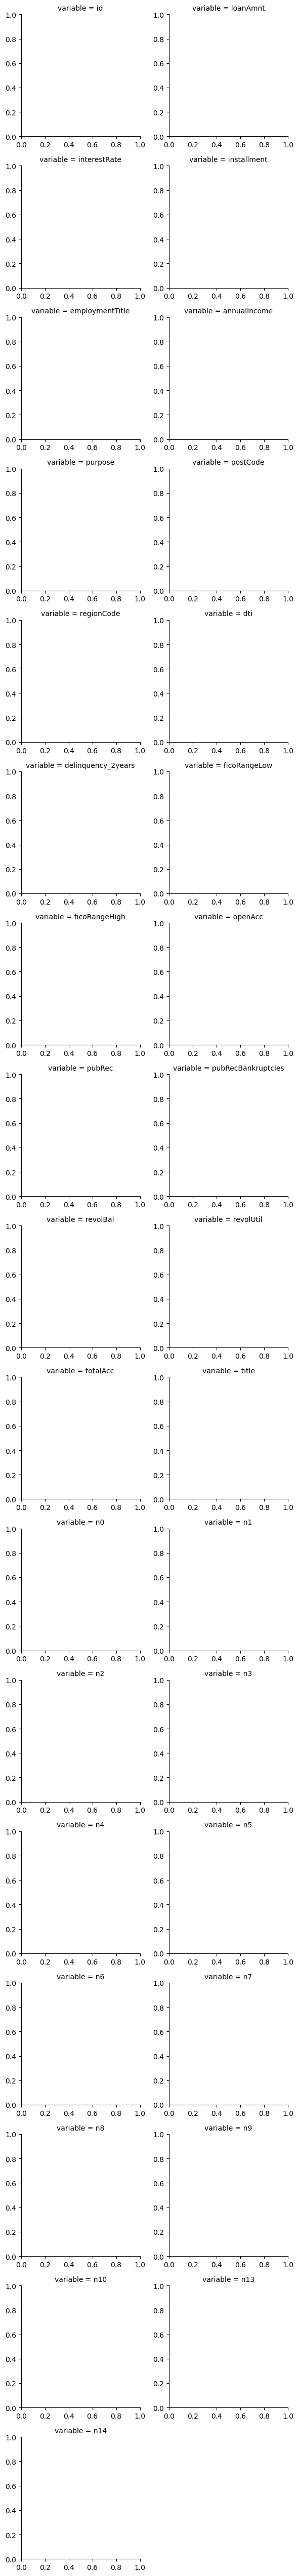

In [23]:
g = sns.FacetGrid(f, col = "variable", col_wrap = 2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

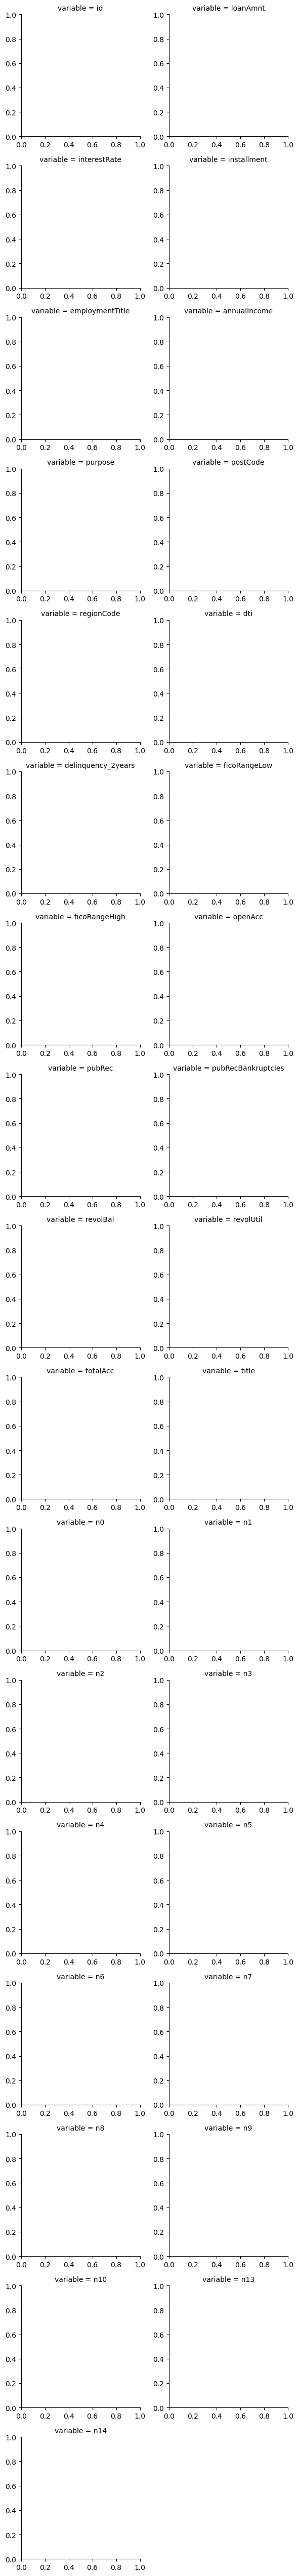

In [25]:
# 创建FacetGrid对象
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)

In [26]:
# 使用tqdm包装g.map()，以添加运行进度条
for ax in tqdm(g.axes.flat, total=len(g.axes.flat), desc="Generating histograms"):
    g.map_dataframe(sns.histplot, "value", ax=ax)

# 显示图形
plt.tight_layout()
plt.show()

Generating histograms:   0%|                             | 0/33 [00:00<?, ?it/s]Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x2d67d4310>
Traceback (most recent call last):
  File "/Users/maguoyi/Library/Python/3.9/lib/python/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 
Generating histograms:   0%|                             | 0/33 [10:35<?, ?it/s]


KeyboardInterrupt: 

### 3.2.6 Non-numerical feature analysis

In [27]:
object_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [28]:
for fea in object_fea:
    a = train[fea].value_counts()
    print(fea, "value and count: \n", a)

grade value and count: 
 grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64
subGrade value and count: 
 subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64
employmentLength value and count: 
 employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64
issueDate value and count: 
 issueDate
2016-03-01    29066
2015-10-01    2552